## NLP Class Assignment 3--Richard Yang

You have been provided with a starter notebook that reads a collection of tweets and a collection of news articles

You need to determine which news articles (news_df) are similar to each other and which tweets (tweets_df) are more similar to each other.  In order to accomplish this you need to create n-grams and compare the similarity of the text using Jaccard distance.

Your final submission must include the following:

Which news articles / tweets were similar and which ones were dissimilar?
A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)
Was the “n” identical or different for articles vs. tweets and why
Visualize the selection of “n”
For the news articles, please explain why you chose text or title or both text + title combined
Include all of your program codes (creating n-grams from text as well as selecting the “n” for analysis)
Additional instructions:

To get quality results apply appropriate text cleaning methods
Your submission must be a Python Notebook (ipynb)
Use 'Markdown' in the cell to document your answers / provide comments as needed
Visualize your results instead of writing about them. Remember, a picture is worth a thousand words


In [2]:
import pandas as pd
import regex as re

pd.set_option('display.max_rows', 100)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [3]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_3_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)

print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(2)

Sample contains 1,018 news articles


,url,date,language,title,text
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar..."


#### Read Tweets data

In [4]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_3_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(2)

Sample contains 1,020 tweets


,id,lang,date,name,retweeted,text
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN"


In [5]:
# Clean the text column in the tweets_df dataframe
tweets_df['text_no_url'] = tweets_df['text'].apply(lambda x: re.sub(r'(?:\@|http?\://|https?\://|www)\S+','',str(x)))
tweets_df['text_no_newline'] = tweets_df['text_no_url'].apply(lambda x:re.sub(r'(?:\n)','',str(x)))
tweets_df['text_new'] = tweets_df['text_no_newline'].apply(lambda x: re.sub(r'(?:\B#\w*[a-zA-Z]+\w*)','',str(x)))

In [6]:
# drop the duplicate tweets

tweets_df.drop_duplicates(subset=['text'], inplace=True)

tweets_df.shape

(788, 9)

In [8]:
import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.metrics.distance import jaccard_distance
import matplotlib.pyplot as plt


# Define a function to remove the stopwords and punctuation

def remove_stopwords(words):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # Remove single-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 3]
    # Remove numbers
    words = [word for word in words if not word.isnumeric()]
    # Remove punctuation
    words = [word for word in words if word.isalpha()]
    # Lowercase all words (default_stopwords are lowercase too)
    words = [word.lower() for word in words]
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    return words

In [9]:
# Define a function to create n-grams from text
def create_ngrams(text, n):
    ngrams_list = list(ngrams(text, n))
    return ngrams_list

In [10]:
def clean_text(text):
    tokens = nltk.word_tokenize(text)
    clean_text = remove_stopwords(tokens)
    return clean_text

In [11]:
# apply the clean_text function to the text_new column

tweets_df['clean_text'] = tweets_df['text_new'].apply(clean_text)

In [12]:
# Define a function to calculate Jaccard distance between two sets of n-grams
def calculate_jaccard_distance(ngrams1, ngrams2):
    set1 = set(ngrams1)
    set2 = set(ngrams2)
    # jaccard_dist = 1 - len(set1.intersection(set2)) / len(set1.union(set2)+0.000001)
    jaccard_dist = 1- len(set1 & set2) / (len(set1 | set2) + 0.00001)
    return jaccard_dist

#### Main Function # 1: compare_tweets. Do not set thresholds for jaccard distance

In [13]:
# Define a function to compare similarity between tweets
def compare_tweets_without_thresholds(df, n):
    similar_pairs = []
    dissimilar_pairs = []
    similarity_list = []
    tweet_texts = df['clean_text'].tolist()
    original = df['text'].tolist()
    num_tweets = len(tweet_texts)
    for i in range(num_tweets):
        original_text1 = original[i]  # Get the original text
        tweet1 = tweet_texts[i]
        ngrams1 = create_ngrams(tweet1, n)
        for j in range(i+1, num_tweets):
            original_text2 = original[j]  # Get the original text
            tweet2 = tweet_texts[j]
            ngrams2 = create_ngrams(tweet2, n)
            # Exclude same tweet pairs
            if tweet1 != tweet2:
                jaccard_dist = calculate_jaccard_distance(ngrams1, ngrams2)
                similarity_list.append((original_text1, original_text2, jaccard_dist)) 
    # Sort similar pairs by Jaccard distance in ascending order
    similarity_list.sort(key=lambda x: float(x[2]))  # Convert jaccard_dist back to float for sorting
    # # Sort dissimilar pairs by Jaccard distance in descending order
    # dissimilar_pairs.sort(key=lambda x: float(x[2]), reverse=True)  # Convert jaccard_dist back to float for sorting
    return similarity_list


In [14]:
def find_best_ngram_without_thresholds(df, ngram_range):
    x, y = [], []
    for i in range(ngram_range[0], ngram_range[1]):
        df1 = df[['text']].copy()  # Make a copy of the DataFrame to avoid chained indexing
        df1['clean_text'] = df1['text'].apply(lambda x: clean_text(x)) # get a subset of dataframe and apply lambda function
        top_pairs_similar = compare_tweets_without_thresholds(df1, i)
        top_pairs_df = pd.DataFrame(top_pairs_similar, columns=['Pair1', 'Pair2', 'Jaccard_Distance'])
        avg_jaccard_distance = 100 * top_pairs_df['Jaccard_Distance'].mean()
        x.append(i)
        y.append(avg_jaccard_distance)
    return x, y

In [15]:
x, y = find_best_ngram_without_thresholds(tweets_df, ngram_range=(1, 15))

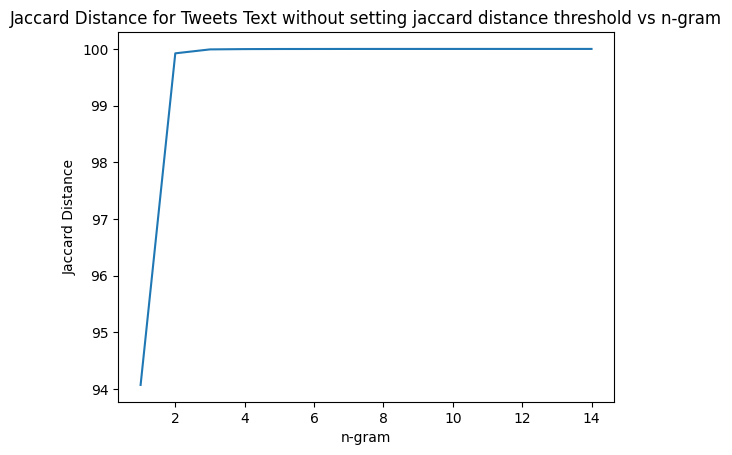

In [16]:
# print the best n-gram

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('n-gram')
plt.ylabel('Jaccard Distance')
plt.title('Jaccard Distance for Tweets Text without setting jaccard distance threshold vs n-gram')
plt.show()


Based on the above result, we should choose n=2 as our optimized number of grams. 

However, In my opinion, if we calculate the average jaccard distance based on the whole text data, it will leads to biased average jaccard distance as most of the texts are dissimilar(very large jaccard distance). In addition, it is hard to tell which 'N' we should choose from the above result as the line tends to be horizontal after n = 4. 

Therefore, I think it is necessary to add a threshold for jaccard distance (0.5). 

In this case, we calculate the best 'N' gram based only on how different N performs in relatively similar tweets instead of the whole tweets data.

#### Main Function # 2: compare_tweets. Set thresholds for jaccard distance<=0.5

In [17]:
# Define a function to compare similarity between tweets
def compare_tweets(df, n):
    similar_pairs = []
    dissimilar_pairs = []
    tweet_texts = df['clean_text'].tolist()
    original = df['text'].tolist()
    num_tweets = len(tweet_texts)
    for i in range(num_tweets):
        original_text1 = original[i]  # Get the original text
        tweet1 = tweet_texts[i]
        ngrams1 = create_ngrams(tweet1, n)
        for j in range(i+1, num_tweets):
            original_text2 = original[j]  # Get the original text
            tweet2 = tweet_texts[j]
            ngrams2 = create_ngrams(tweet2, n)
            # Exclude same tweet pairs
            if tweet1 != tweet2:
                jaccard_dist = calculate_jaccard_distance(ngrams1, ngrams2)
                if jaccard_dist <= 0.5:
                    similar_pairs.append((original_text1, original_text2,  jaccard_dist))  
                else:
                    dissimilar_pairs.append((original_text1, original_text2, jaccard_dist))  
    # Sort similar pairs by Jaccard distance in ascending order
    similar_pairs.sort(key=lambda x: float(x[2]))  # Convert jaccard_dist back to float for sorting
    # Sort dissimilar pairs by Jaccard distance in descending order
    dissimilar_pairs.sort(key=lambda x: float(x[2]), reverse=True)  # Convert jaccard_dist back to float for sorting
    return similar_pairs,dissimilar_pairs

In [18]:
def find_best_ngram(df, ngram_range):
    x, y = [], []
    for i in range(ngram_range[0], ngram_range[1]):
        df1 = df[['text']].copy()  # Make a copy of the DataFrame to avoid chained indexing
        df1['clean_text'] = df1['text'].apply(lambda x: clean_text(x)) # get a subset of dataframe and apply lambda function
        top_pairs_similar, top_pairs_dissimilar = compare_tweets(df1, i)
        top_pairs_df = pd.DataFrame(top_pairs_similar, columns=['Pair1', 'Pair2', 'Jaccard_Distance'])
        avg_jaccard_distance = 100 * top_pairs_df['Jaccard_Distance'].mean()
        x.append(i)
        y.append(avg_jaccard_distance)
    return x, y


In [19]:
x, y = find_best_ngram(tweets_df, ngram_range=(1, 15))

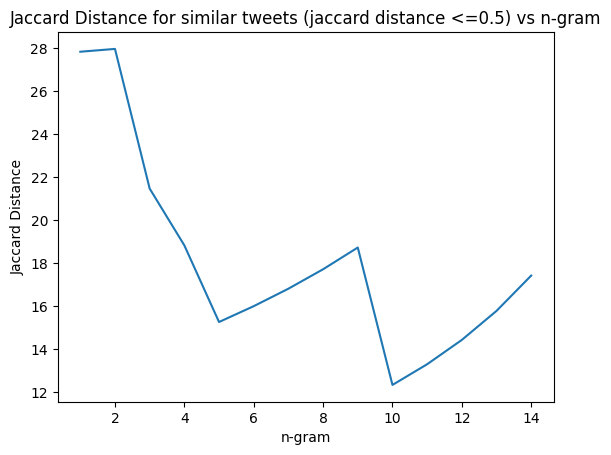

In [20]:
# print the best n-gram

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('n-gram')
plt.ylabel('Jaccard Distance')
plt.title('Jaccard Distance for similar tweets (jaccard distance <=0.5) vs n-gram')
plt.show()


In [36]:
# Choose value of n for n-grams analysis
n = 5

# Compare similarity between tweets
similar_tweets_pairs, dissimilar_tweets_pairs  = compare_tweets(tweets_df, n)

# Convert similar_tweet_pairs to DataFrame
similar_df = pd.DataFrame(similar_tweets_pairs, columns=['Pair1', 'Pair2', 'Jaccard_Distance'])

similar_df

,Pair1,Pair2,Jaccard_Distance
0,Renault Kiger is stunning yet muscular SUV stance is crafted to complement your free spirit. \n#renault #cars #nagercoil #Sportysmart #renaultcars #renaultindia #bestcars #buycarsnagercoil #morespacing #renaultkiger https://t.co/0gaRyxca7h,https://t.co/DFfqSVOypZ \nKiger is stunning yet muscular SUV stance is crafted to complement your free spirit.\n#renault #cars #nagercoil #Sportysmart #renaultcars #renaultindia #bestcars #buycarsnagercoil #morespacing #renaultkiger https://t.co/LzLJ0IjpyT,0.200002
1,"@cz_binance But what can u tell about @BeaRex_io? They worked with such brands as Spotify, Intel, Amway, Netflix, Blizzard, Sharp, Canon, Loewe, Huawei, Bentley, Audi, Renault, Oriflame. And they have the first instagram mask highly profitable game!","@AboxCrypto @socialdudesnft But what can ya claim about @BeaRexOfficial? They worked with such brands as Spotify, Intel, Amway, Netflix, Blizzard, Sharp, Canon, Loewe, Huawei, Bentley, Audi, Renault, Oriflame. And they have the first instagram mask highly valuable game! https://t.co/qFn1mX16CQ",0.285715


Although N=5 seems to be a good choice of 'N', the average jaccard distance when n is getting large can be also biased as the sample size is too small. 

#### Therefore, I decided to stick to N=2 as my choice of 'N'

Similar Tweets:

In [51]:
# Choose value of n for n-grams analysis
n = 2

# Compare similarity between tweets
similar_tweets_pairs  = compare_tweets_without_thresholds(tweets_df, n)

# Convert similar_tweet_pairs to DataFrame
similar_df = pd.DataFrame(similar_tweets_pairs, columns=['Pair1', 'Pair2', 'Jaccard_Distance'])

similar_df.head(9)

,Pair1,Pair2,Jaccard_Distance
0,Renault Kiger is stunning yet muscular SUV stance is crafted to complement your free spirit. \n#renault #cars #nagercoil #Sportysmart #renaultcars #renaultindia #bestcars #buycarsnagercoil #morespacing #renaultkiger https://t.co/0gaRyxca7h,https://t.co/DFfqSVOypZ \nKiger is stunning yet muscular SUV stance is crafted to complement your free spirit.\n#renault #cars #nagercoil #Sportysmart #renaultcars #renaultindia #bestcars #buycarsnagercoil #morespacing #renaultkiger https://t.co/LzLJ0IjpyT,0.125001
1,"@cz_binance But what can u tell about @BeaRex_io? They worked with such brands as Spotify, Intel, Amway, Netflix, Blizzard, Sharp, Canon, Loewe, Huawei, Bentley, Audi, Renault, Oriflame. And they have the first instagram mask highly profitable game!","@AboxCrypto @socialdudesnft But what can ya claim about @BeaRexOfficial? They worked with such brands as Spotify, Intel, Amway, Netflix, Blizzard, Sharp, Canon, Loewe, Huawei, Bentley, Audi, Renault, Oriflame. And they have the first instagram mask highly valuable game! https://t.co/qFn1mX16CQ",0.250000
2,"⚡️ Reuters: French automaker Renault resumes production in Moscow.\n\nOn March 22, the company decided to resume operations in the country. Renault is the majority owner of AvtoVaz, Russia’s largest car manufacturer famous for the Lada brand.","Reuters: French automaker #Renault resumes production in Moscow.\n\nOn March 22, the company decided to resume operations in the country. Renault is the majority owner of #AvtoVaz, Russia’s largest car manufacturer famous for the Lada brand.\n\n#Russia #Ukraine️ #news #BreakingNews",0.260870
3,ai... anything but a renault kwid i guess. https://t.co/vIRj1Cals7,8. anything but a renault kwid. https://t.co/uzJZyPFCM7,0.333336
4,"Damon Hill (Rothmans Williams-Renault V10, FW15D). Pre-Season Testing, Estoril Circuit, 20th January 1994. #F1 https://t.co/q5Nln428r5","Damon Hill (Rothmans Williams-Renault V10, FW18). Pre-Season Testing, Estoril Circuit, Portugal, February 1996. #F1 https://t.co/JRoTUDi4ou",0.375001
5,Finally.\n\nBoulogne-Billancourt – The Board of Directors of Renault Group met today and approved the following items:\n•Renault Group activities in its manufacturing plant in Moscow are suspended as of today.,Renault industrial activities in Russia are suspended The Board of Directors of Renault Group met today and approved the following items: - @RenaultGroup activities in its manufacturing plant in Moscow are suspended as of today. https://t.co/I5036FK7UE,0.400000
6,"HE LEFT RED BULL, HE WENT TO RENAULT, HE'S GONE TO MCLAREN, HE'S GOING TO GET THE VICTORY NOW, ITS MCLAREN AND RICCIARDO THAT WIN THE ITALIAN GP","HE LEFT RED BULL, HE WENT TO RENAULT, HE'S GONE TO MCLAREN, HE'S GOING TO GET THE VICTORY NOW, ITS MCLAREN AND RICCIARDO THAT WIN THE ITALIAN GP IS THE MOST OVERRATED COMMENTARY EVER. THERE IS NOTHING SPECIAL ABOUT THIS. NO SOUL NO PASSION NOTHING",0.444445
7,"Renault resumes car production in Moscow as rivals cut ties with Russia. Not that I had any plans to buy one of their cars in the first place, but now I never will. https://t.co/hQPyHpv9Iq",Renault resumes car production in Moscow as rivals cut ties with Russia https://t.co/tNzA4eUke2,0.454546
8,"2023 driver line-up confirmed: Esteban Ocon 🤝 Oscar Piastri\n\nAfter four years as part of the Renault and Alpine family, Reserve Driver Oscar Piastri is promoted to a race seat alongside Esteban Ocon starting from 2023. https://t.co/4Fvy0kaPn7","2023 driver line-up confirmed: Esteban Ocon 🤝 Pablo Cuartero\n\nAfter six years as part of the Renault and Alpine family, Reserve Driver Pablo Cuartero is promoted to a race seat alongside Esteban Ocon starting from 2023. https://t.co/uwe9GdytaA",0.481482


Dissimilar Tweets

In [103]:
# Filter for rows where 'Jaccard_Distance' is less than or equal to 0.95
dissimilar_df = similar_df[similar_df['Jaccard_Distance'] <= 0.95]

#filter the dataframe to get the 29, 33, 66, 86, 128th row

dissimilar_df.iloc[[29, 33, 66, 86, 128, 824]]


,Pair1,Pair2,Jaccard_Distance
29,French state-backed Renault resumes car production in Moscow despite condemnation of Ukraine war\nhttps://t.co/nFGpS1LCh8,Renault resumes car production in Moscow as rivals cut ties with Russia https://t.co/tNzA4eUke2,0.700000
33,Renault resumes car production in Moscow. So much for sanctions. https://t.co/3Pv0AnsQh8,Renault resumes car production in #Russia as rivals withdraw https://t.co/FBqhJb9Kou,0.714286
66,@WilliamsRacing Switch to Renault engine,Latest Renault F1 engine “within 10bhp” of the best https://t.co/pbGQ3R15yY,0.800000
86,"Elio de Angelis finished up as the quickest of the Pirelli-shod contingent. The Italian 5th fastest (1 min:39.312 sec) in his Lotus-Renault-93T. \n\nFrench Grand Prix, (final qualifying), Paul Ricard, 16 April 1983.\n\n© Motorsport Images \n\n#F1 https://t.co/kXU9F5JTrv","Nigel Mansell (Lotus-Renault-95T) matched his best F1 qualifying position so far with an impressive 3rd place. (1 min:05.125 sec) \n\nSouth African Grand Prix, (final qualifying), Kyalami, 6 April 1984.\n\n© Motorsport Images \n\n#F1 https://t.co/6FphVofFtr",0.821429
128,Carmaker Renault said it would suspend operations at its plant in Moscow. The move comes as pressure mounts over the French company's continued presence in Russia since the country's invasion of Ukraine https://t.co/FFSwwtQnDO,"Renault, the Western carmaker most exposed to the Russian market, said it would suspend operations at its plant in Moscow while it assesses options on its majority stake in Avtovaz, the country's No. 1 carmaker https://t.co/LVUlSTblz3 https://t.co/thmrElxdA5",0.848485
824,"Damon Hill / Ayrton Senna (Rothmans Williams-Renault FW16). Pre-Season Testing, Paul Ricard Circuit, France, 28th February 1994. #F1 https://t.co/cVl4EV7WHf","Ayrton Senna tests the new Rothmans Williams-Renault FW16 for the first time at Silverstone. \nPre-Season Testing, 24th February 1994. #F1 (Part 1 of 2)\nhttps://t.co/9OORCyKqtu",0.944444


## Conclusion for Tweets: 

Many '1's might lead to biased average jaccard distance, adding a 0.5 thresold seems to be a good solution. However, when N is getting large, because of the length of tweets text is usually small, the number of similar pairs(jaccard distance <=0.5) is also getting smaller. 

Therefore, a good trade-off 'N' for Tweets Text is when 2. I will choose N=2 as my optimal number of grams

# News --text


In [76]:
# Clean the text column in the news_df dataframe
news_df['text_no_url'] = news_df['text'].apply(lambda x: re.sub(r'(?:\@|http?\://|https?\://|www)\S+','',str(x)))
news_df['text_no_newline'] = news_df['text_no_url'].apply(lambda x:re.sub(r'(?:\n)','',str(x)))
news_df['text_new'] = news_df['text_no_newline'].apply(lambda x: re.sub(r'(?:\B#\w*[a-zA-Z]+\w*)','',str(x)))

In [77]:
# drop the duplicate News

news_df.drop_duplicates(subset=['text_new'], inplace=True)
news_df.shape

(1018, 8)

In [79]:
# apply the clean_text function to the text_new column

news_df['clean_text'] = news_df['text_new'].apply(clean_text)

Since the News text normally has large number of words, which will lead to large number of grams. I start calling the find_best_ngram function starting from ngram=2 instead of 1. So I can reach to higher number of grams=14 without consuming too much computational power

Additionally, there is a threshold(Jaccard Distance <=0.5) embeded in the find_best_ngram function. This will help aviod generating biased average jaccard distance when there are too many high jaccard distance text pairs.

In [ ]:
x, y = find_best_ngram(news_df, ngram_range=(2, 15))

In [147]:
# create a new dataframe to store the results

df_newstext = pd.DataFrame({'n-gram': x, 'Jaccard Distance': y})

df_newstext

,n-gram,Jaccard Distance
0,2,22.986230
1,3,24.177687
2,4,27.294702
3,5,28.309807
4,6,29.568475
5,7,30.810216
6,8,31.792709
7,9,33.230797
8,10,34.199262
9,11,32.868250


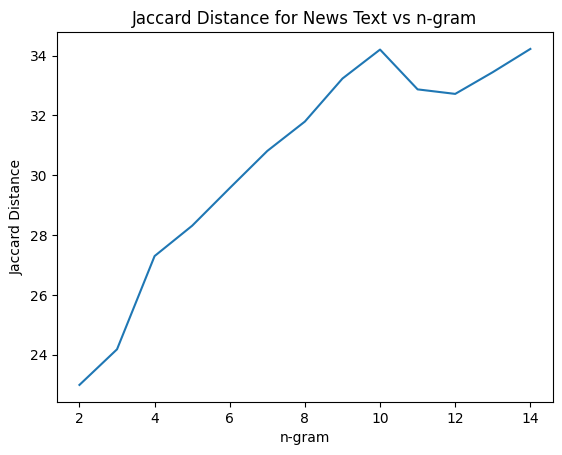

In [144]:
# print the best n-gram

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('n-gram')
plt.ylabel('Jaccard Distance')
plt.title('Jaccard Distance for News Text vs n-gram')
plt.show()


###  Therefore, I choose n=4 as my optimal number of grams

In [80]:
n = 4
# Compare similarity between tweets
similar_newstext_pairs, dissimilar_newstext_pairs = compare_tweets(news_df, 4)

In [81]:
# Convert similar_tweet_pairs to DataFrame
similar_df_newstext = pd.DataFrame(similar_newstext_pairs, columns=['Pair1', 'Pair2', 'Jaccard_Distance'])
# Convert dissimilar_tweet_pairs to DataFrame
dissimilar_df_newstext = pd.DataFrame(dissimilar_newstext_pairs, columns=['Pair1', 'Pair2', 'Jaccard_Distance'])

Similar News text:

In [85]:
similar_df_newstext.iloc[[2,32,52,72]]

,Pair1,Pair2,Jaccard_Distance
2,"Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...","Toyota Urban Cruiser Car Discount Offers in Mayurbhanja for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculato...",0.013986
32,"Toyota Urban Cruiser Car Discount Offers in Nirjuli for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDea...","Toyota Urban Cruiser Car Discount Offers in Jajpur Road for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculato...",0.015238
52,"Toyota Urban Cruiser Car Discount Offers in Nandurbar for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorD...","Toyota Urban Cruiser Car Discount Offers in Nanded for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...",0.055416
72,"Toyota Urban Cruiser Car Discount Offers in Ghogha for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...","Toyota Urban Cruiser Car Discount Offers in Kapadwanj for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.H

In order to get a clearer view on the similarity check, I decided to print the rows that have distinct jaccard distance

In [111]:
# write a for loop, if the Jaccard Distance of previous row is equal to the current row, then drop the current row. store the result in a new dataframe

similar_df_newstext_show = similar_df_newstext.copy()
for i in range(1, len(similar_df_newstext)):
    if similar_df_newstext.iloc[i, 2] == similar_df_newstext.iloc[i-1, 2]:
        similar_df_newstext_show.drop([i], inplace=True)    

similar_df_newstext_show.head(10)


,Pair1,Pair2,Jaccard_Distance
0,"Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...","Toyota Urban Cruiser Car Discount Offers in Kandhamal for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorD...",0.013456
28,"Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...","Toyota Urban Cruiser Car Discount Offers in Jajpur Road for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculato...",0.014661
36,"Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...","Toyota Urban Cruiser Car Discount Offers in Khurda Andhra Pradesh for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI...",0.015863
44,"Toyota Urban Cruiser Car Discount Offers in Khurda Andhra Pradesh for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI...","Toyota Urban Cruiser Car Discount Offers in Jajpur Road for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved

Dissimilar Nes Text: 

In [101]:
# filter the dissimilar_df_newstext dataframe delete the rows where Jaccard Distance is greater than 0.95, store the result in a new dataframe

dissimilar_df_newstext_show = dissimilar_df_newstext[dissimilar_df_newstext['Jaccard_Distance'] <= 0.95]
dissimilar_df_newstext_show.iloc[[10,10000,20000]]

,Pair1,Pair2,Jaccard_Distance
387849,BMW M3 vs Audi RS3: 4WD sports saloons face off | Autocar Car ReviewsLatest car reviewsIn-depth road test reviewsFirst drive reviewsLong-term reviewsTop 10s: Best Cars on saleVideo reviewsCar NewsLatest newsAdviceOpinionsFeaturesUsed carsUsed car homeUsed car dealsNearly new buying guidesUsed car buying guidesElectricMotorsportBusinessLatest Business newsWebinars and podcasts OffersGap InsuranceWarrantyLeasingSell your carSubscribeSubscribe to magazineAutocar NewsletterAutocar Archive…Car Re...,Toyota GR Series: bred on-track; designed to be driven | Autocar Car ReviewsLatest car reviewsIn-depth road test reviewsFirst drive reviewsLong-term reviewsTop 10s: Best Cars on saleVideo reviewsCar NewsLatest newsAdviceOpinionsFeaturesUsed carsUsed car homeUsed car dealsNearly new buying guidesUsed car buying guidesElectricMotorsportBusinessLatest Business newsWebinars and podcasts Great Women Top 100Company carsCompany car tax calculatorCompany car adviceOffersGap InsuranceWarrantyWhat Car...,0.949670
397839,"Audi Car Dealers - Audi Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBike NewsLate...","Toyota Urban Cruiser Car Discount Offers in Mahrajganj for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculator...",0.883333
407839,"Honda Bikes Car Dealers - Honda Bikes Showrooms in India Explore Saturday, 8 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar Ne...","Toyota Urban Cruiser Car Discount Offers in Gopalganj for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorD...",0.801262


For News Text, As we can see from the above table, the output shows a clear and obvious conclusion that when n=4, using the techques of jaccard distance and n-gram has a good ability in identifying the similar text

The reason that I choose text to analyze similarity instead of title is because the title is the extracted and summarized version of text. The text has already contains all the neccessary information for title.



#### In Summary, I choose n=2 for Tweets text and n=4 for News text so that I can better indentify the similarity between different texts.